# Final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv')

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G..."
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G..."
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G..."
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G..."
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G..."


In [4]:
#check if there is review for the whole year of 2018

a = df[df['year']==2018]
a[a['month']>10]
#year 2018 only contains data from Jan to October

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank


In [5]:
#remove insignificant category
remove = df[df['cat2'] == 'Digital Games'].index
df.drop(remove,inplace=True)
remove2 = df[df['cat2'] == ''].index
df.drop(remove2,inplace=True)
remove3 = df[df['cat2'] == 'Kids & Family'].index
df.drop(remove3,inplace=True)
remove4 = df[df['verified']== False].index
df.drop(remove4,inplace=True)

#remove5 = df[df['year']==2018].index
#df.drop(remove5, inplace=True)

In [6]:
df0 = df.groupby('asin')['timestamp'].agg(['min','max']).reset_index()

In [7]:
df0.loc[:,'start'] = pd.to_datetime(df0.loc[:,'min'])
df0.loc[:,'stop'] = pd.to_datetime(df0.loc[:,'max'])

In [8]:
df0.loc[:,'delta'] = df0['stop'] - df0['start']

In [9]:
df0

,asin,min,max,start,stop,delta
0,0042000742,2015-03-11,2015-03-11,2015-03-11,2015-03-11,0 days
1,0078764343,2013-07-07,2013-08-24,2013-07-07,2013-08-24,48 days
2,0276425316,2017-01-04,2017-01-04,2017-01-04,2017-01-04,0 days
3,0324411812,2015-09-11,2015-09-11,2015-09-11,2015-09-11,0 days
4,0439335299,2014-12-07,2014-12-07,2014-12-07,2014-12-07,0 days
...,...,...,...,...,...,...
66511,B01HJ14OT0,2016-08-23,2016-08-23,2016-08-23,2016-08-23,0 days
66512,B01HJ14TTA,2016-08-25,2017-09-26,2016-08-25,2017-09-26,397 days
66513,B01HJ1521Y,2016-09-05,2016-09-05,2016-09-05,2016-09-05,0 days
66514,B01HJC33WS,2016-08-28,2018-09-07,2016-08-28,2018-09-07,740 days


In [10]:
df = pd.merge(df,df0, how='left')

In [11]:
remove0 = df[df['delta'].dt.days < 182].index

df.drop(remove0, inplace=True)

In [12]:
gr_cat = df.groupby('cat2')
gr_verified = df.groupby('verified')
gr_year = df.groupby(['year','cat2'])

In [13]:
df2 = pd.DataFrame(gr_cat['count'].agg(np.sum))
df2.reset_index(inplace=True)

In [14]:
x = df2['cat2']
y = df2['count']

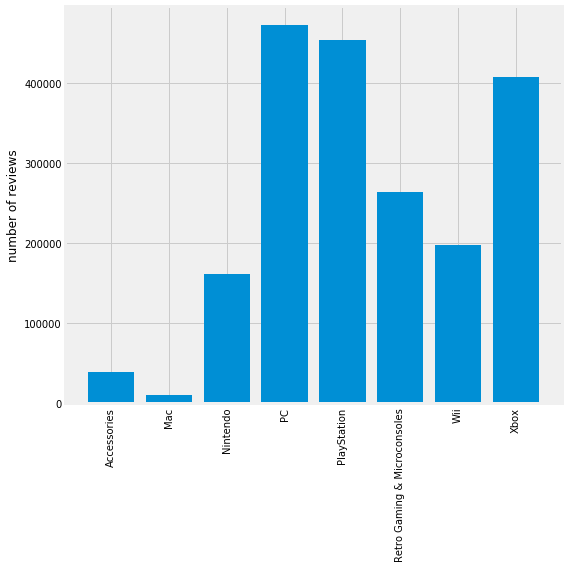

In [15]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)

ax.bar(x,y)
ax.set_xticklabels(x, rotation='vertical')
ax.set_ylabel('number of reviews')

plt.tight_layout()
plt.show()

In [16]:
df3 = pd.DataFrame(gr_cat['overall'].agg(np.mean))
df3.reset_index(inplace=True)

In [17]:
x2 = df3['cat2']
y2 = df3['overall']

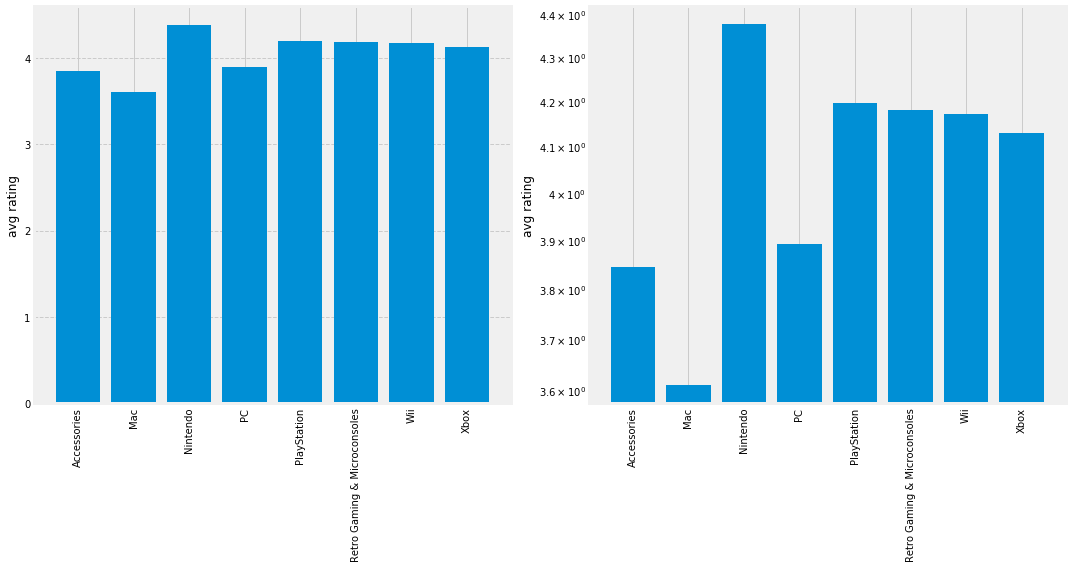

In [18]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)

ax.bar(x2,y2)
ax.set_xticklabels(x, rotation='vertical')
ax.set_ylabel('avg rating')
ax.grid(ls='--', axis='y')

ax2 = fig.add_subplot(122)

ax2.bar(x2,y2)
ax2.set_xticklabels(x, rotation='vertical')
ax2.set_ylabel('avg rating')
ax2.set_yscale('log')


plt.tight_layout()
plt.show()

In [19]:
df4 = pd.DataFrame(df.groupby(['cat2','year'])['count'].agg(np.sum))
df4.reset_index(inplace=True)

In [20]:
df4

,cat2,year,count
0,Accessories,2001,2
1,Accessories,2002,2
2,Accessories,2006,8
3,Accessories,2007,54
4,Accessories,2008,218
...,...,...,...
125,Xbox,2014,65985
126,Xbox,2015,93154
127,Xbox,2016,85601
128,Xbox,2017,51673


In [21]:
df5 = df4[df4['cat2'] == 'Accessories']
df6 = df4[df4['cat2'] == 'Mac']
df7 = df4[df4['cat2'] == 'Nintendo']
df8 = df4[df4['cat2'] == 'PC']
df9 = df4[df4['cat2'] == 'PlayStation']
df10 = df4[df4['cat2'] == 'Retro Gaming & Microconsoles']
df11 = df4[df4['cat2'] == 'Wii']
df12 = df4[df4['cat2'] == 'Xbox']

In [22]:
df5

,cat2,year,count
0,Accessories,2001,2
1,Accessories,2002,2
2,Accessories,2006,8
3,Accessories,2007,54
4,Accessories,2008,218
5,Accessories,2009,421
6,Accessories,2010,666
7,Accessories,2011,875
8,Accessories,2012,1772
9,Accessories,2013,4367


In [23]:
x5 = df5['year']
y5 = df5['count']

x6 = df6['year']
y6 = df6['count']

x7 = df7['year']
y7 = df7['count']

x8 = df8['year']
y8 = df8['count']

x9 = df9['year']
y9 = df9['count']

x10 = df10['year']
y10= df10['count']

x11 = df11['year']
y11 = df11['count']

x12 = df12['year']
y12 = df12['count']


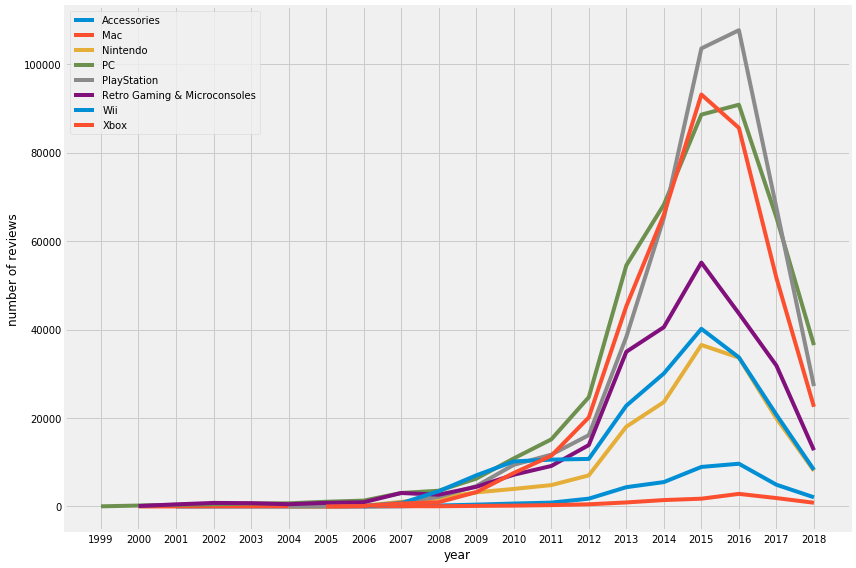

In [24]:
fig = plt.figure(figsize=(12,8))

year = np.arange(1997,2019,1)

ax = fig.add_subplot(111, xticks=year, xticklabels=year)

ax.plot(x5,y5, label= 'Accessories')
ax.plot(x6,y6, label= 'Mac')
ax.plot(x7,y7, label= 'Nintendo')
ax.plot(x8,y8, label= 'PC')
ax.plot(x9,y9, label= 'PlayStation')
ax.plot(x10,y10, label= 'Retro Gaming & Microconsoles')
ax.plot(x11,y11, label= 'Wii')
ax.plot(x12,y12, label= 'Xbox')


ax.legend()
ax.set_ylabel('number of reviews')
ax.set_xlabel('year')

fig.tight_layout()
plt.show()

In [25]:
df13 = pd.DataFrame(df.groupby(['cat2','year'])['overall'].agg(np.mean))
df13.reset_index(inplace=True)

In [26]:
df13

,cat2,year,overall
0,Accessories,2001,4.000000
1,Accessories,2002,5.000000
2,Accessories,2006,3.250000
3,Accessories,2007,3.296296
4,Accessories,2008,4.284404
...,...,...,...
125,Xbox,2014,4.189270
126,Xbox,2015,4.192788
127,Xbox,2016,4.127966
128,Xbox,2017,4.028177


In [27]:
df14 = df13[df13['cat2'] == 'Accessories']
df15 = df13[df13['cat2'] == 'Mac']
df16 = df13[df13['cat2'] == 'Nintendo']
df17 = df13[df13['cat2'] == 'PC']
df18 = df13[df13['cat2'] == 'PlayStation']
df19 = df13[df13['cat2'] == 'Retro Gaming & Microconsoles']
df20 = df13[df13['cat2'] == 'Wii']
df21 = df13[df13['cat2'] == 'Xbox']

In [28]:
x14 = df14['year']
y14 = df14['overall']

x15 = df15['year']
y15 = df15['overall']

x16 = df16['year']
y16 = df16['overall']

x17 = df17['year']
y17 = df17['overall']

x18 = df18['year']
y18 = df18['overall']

x19 = df19['year']
y19 = df19['overall']

x20 = df20['year']
y20 = df20['overall']

x21 = df21['year']
y21 = df21['overall']


In [29]:
df22 = pd.DataFrame(df.groupby('year')['overall'].agg(np.mean))
df22.reset_index(inplace=True)

In [30]:
x22 = df22['year']
y22 =df22['overall']

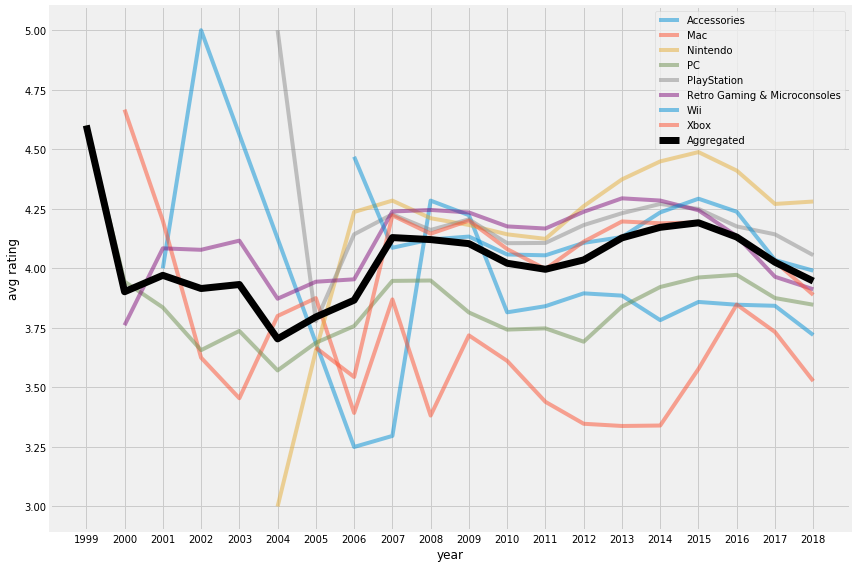

In [31]:
fig = plt.figure(figsize=(12,8))

year = np.arange(1997,2019,1)

ax = fig.add_subplot(111, xticks=year, xticklabels=year)

ax.plot(x14,y14, label= 'Accessories', alpha=0.5)
ax.plot(x15,y15, label= 'Mac', alpha=0.5)
ax.plot(x16,y16, label= 'Nintendo', alpha=0.5)
ax.plot(x17,y17, label= 'PC', alpha=0.5)
ax.plot(x18,y18, label= 'PlayStation', alpha=0.5)
ax.plot(x19,y19, label= 'Retro Gaming & Microconsoles', alpha=0.5)
ax.plot(x20,y20, label= 'Wii', alpha=0.5)
ax.plot(x21,y21, label= 'Xbox', alpha=0.5)

ax.plot(x22,y22, label='Aggregated', color='k', lw=7)

ax.legend()
ax.set_ylabel('avg rating')
ax.set_xlabel('year')

fig.tight_layout()
plt.show()

In [32]:
df23 = pd.DataFrame(df.groupby('year')['count'].agg(np.sum))
df23.reset_index(inplace=True)

In [33]:
y22_1 = df23['count']

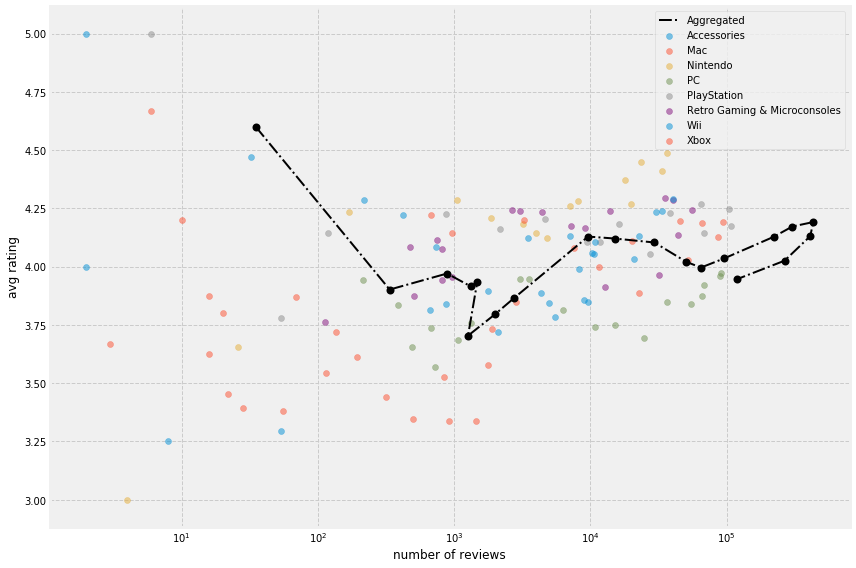

In [34]:
fig = plt.figure(figsize=(12,8))

year = np.arange(1997,2019,1)

ax = fig.add_subplot(111)

ax.scatter(y5,y14, label= 'Accessories', alpha=0.5)
ax.scatter(y6,y15, label= 'Mac', alpha=0.5)
ax.scatter(y7,y16, label= 'Nintendo', alpha=0.5)
ax.scatter(y8,y17, label= 'PC', alpha=0.5)
ax.scatter(y9,y18, label= 'PlayStation', alpha=0.5)
ax.scatter(y10,y19, label= 'Retro Gaming & Microconsoles', alpha=0.5)
ax.scatter(y11,y20, label= 'Wii', alpha=0.5)
ax.scatter(y12,y21, label= 'Xbox', alpha=0.5)


ax.plot()

ax.scatter(y22_1,y22, color='k', lw=2)
ax.plot(y22_1,y22, label='Aggregated', color='k', lw=2, ls='-.')


ax.legend()
ax.set_ylabel('avg rating')
ax.set_xlabel('number of reviews')
ax.set_xscale('log')
ax.grid(ls='--')

fig.tight_layout()
plt.show()

## Rank

In [35]:
dfnew = df['rank'].str.split('>',n=1,expand=True)

dfnew = dfnew[1].str.split('#', n=1, expand=True)

dfnew = dfnew[1].str.split(' ', n=1, expand=True)

In [36]:
dfnew = pd.DataFrame(dfnew[0])

In [37]:
dfnew.loc[:,'rank2'] = dfnew[0]

In [38]:
dfnew.drop(0, axis=1, inplace=True)

In [39]:
dfnew.head()

,rank2
0,"5,927"
1,"5,927"
2,"5,927"
3,"5,927"
4,"5,927"


In [40]:
dfnew = pd.DataFrame(dfnew['rank2'])

In [41]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023937 entries, 0 to 2056880
Data columns (total 1 columns):
rank2    object
dtypes: object(1)
memory usage: 30.9+ MB


In [42]:
df = pd.concat([df,dfnew], axis=1)

In [43]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,min,max,start,stop,delta,rank2
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...",2012-10-29,2018-03-17,2012-10-29,2018-03-17,1965 days,"5,927"
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...",2012-10-29,2018-03-17,2012-10-29,2018-03-17,1965 days,"5,927"
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...",2012-10-29,2018-03-17,2012-10-29,2018-03-17,1965 days,"5,927"
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...",2012-10-29,2018-03-17,2012-10-29,2018-03-17,1965 days,"5,927"
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...",2012-10-29,2018-03-17,2012-10-29,2018-03-17,1965 days,"5,927"


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023937 entries, 0 to 2056880
Data columns (total 18 columns):
asin              object
overall           float64
verified          bool
timestamp         object
month             int64
year              int64
unixReviewTime    int64
reviewerID        object
vote              object
count             int64
cat2              object
rank              object
min               object
max               object
start             datetime64[ns]
stop              datetime64[ns]
delta             timedelta64[ns]
rank2             object
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), object(9), timedelta64[ns](1)
memory usage: 279.9+ MB


In [45]:
# need to convert rank2 from object to integer

In [46]:
dfnew = pd.DataFrame(df[['asin','overall','rank2','count','cat2']])
dfnew.head()

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC


In [47]:
dfnew.dropna(inplace=True)

In [48]:
a = dfnew['rank2'].str.split(',')

b= []

for i in a:
    if len(i) == 2:
        b.append(int(i[0]+i[1]))
    elif len(i) ==3:
        b.append(int(i[0]+i[1]+i[2]))
    else:
        b.append(int(i[0]))

In [49]:
b = pd.DataFrame(b, columns=['rank2'])
b

,rank2
0,5927
1,5927
2,5927
3,5927
4,5927
...,...
1950712,434
1950713,434
1950714,434
1950715,434


In [50]:
dfnew

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC
...,...,...,...,...,...
2056876,B01HJEBIAA,5.0,434,1,PC
2056877,B01HJEBIAA,5.0,434,1,PC
2056878,B01HJEBIAA,5.0,434,1,PC
2056879,B01HJEBIAA,5.0,434,1,PC


In [51]:
dfnew.drop(['rank2'],axis=1,inplace=True)

dfnew.drop(['rank2'], axis=1, inplace=True)

In [52]:
dfnew.reset_index(inplace=True)
b.reset_index(inplace=True)

In [53]:
dfnew

,index,asin,overall,count,cat2
0,0,0439381673,1.0,1,PC
1,1,0439381673,3.0,1,PC
2,2,0439381673,4.0,1,PC
3,3,0439381673,1.0,1,PC
4,4,0439381673,4.0,1,PC
...,...,...,...,...,...
1950712,2056876,B01HJEBIAA,5.0,1,PC
1950713,2056877,B01HJEBIAA,5.0,1,PC
1950714,2056878,B01HJEBIAA,5.0,1,PC
1950715,2056879,B01HJEBIAA,5.0,1,PC


In [54]:
dfnew = pd.concat([dfnew,b], axis=1)

In [55]:
dfnew

,index,asin,overall,count,cat2,index,rank2
0,0,0439381673,1.0,1,PC,0,5927
1,1,0439381673,3.0,1,PC,1,5927
2,2,0439381673,4.0,1,PC,2,5927
3,3,0439381673,1.0,1,PC,3,5927
4,4,0439381673,4.0,1,PC,4,5927
...,...,...,...,...,...,...,...
1950712,2056876,B01HJEBIAA,5.0,1,PC,1950712,434
1950713,2056877,B01HJEBIAA,5.0,1,PC,1950713,434
1950714,2056878,B01HJEBIAA,5.0,1,PC,1950714,434
1950715,2056879,B01HJEBIAA,5.0,1,PC,1950715,434


In [56]:
dfnew2 = pd.DataFrame(dfnew.groupby('asin')['overall'].agg(np.mean))

In [57]:
dfnew3 = pd.DataFrame(dfnew.groupby('asin')['count'].agg(np.sum))

In [58]:
dfnew4 = pd.DataFrame(dfnew.groupby('asin')['rank2'].agg(np.mean))

In [59]:
dfnew5 = pd.DataFrame(dfnew.drop_duplicates(['asin']))

In [60]:
dfnew5 = dfnew5[['asin', 'cat2']]

In [61]:
dfnew2

,overall
asin,
043933702X,3.666667
0439339960,4.000000
0439342260,4.500000
0439381673,3.404762
0439394422,3.000000
...,...
B01HIZGKOE,3.346154
B01HJ14FDA,5.000000
B01HJ14TTA,3.666667


In [62]:
dfnew3

,count
asin,
043933702X,6
0439339960,3
0439342260,2
0439381673,42
0439394422,3
...,...
B01HIZGKOE,26
B01HJ14FDA,3
B01HJ14TTA,3


In [63]:
dfnew4

,rank2
asin,
043933702X,51505
0439339960,87937
0439342260,114262
0439381673,5927
0439394422,64461
...,...
B01HIZGKOE,5207
B01HJ14FDA,36386
B01HJ14TTA,62150


In [64]:
dfnew5.set_index('asin', inplace=True)

In [65]:
dfnewfinal = pd.concat([dfnew2,dfnew3,dfnew4,dfnew5],axis=1, sort=False)

In [66]:
dfnewfinal.reset_index(inplace=True)

In [67]:
dfnewfinal

,index,overall,count,rank2,cat2
0,043933702X,3.666667,6,51505,PC
1,0439339960,4.000000,3,87937,PC
2,0439342260,4.500000,2,114262,PC
3,0439381673,3.404762,42,5927,PC
4,0439394422,3.000000,3,64461,PC
...,...,...,...,...,...
41724,B01HIZGKOE,3.346154,26,5207,PlayStation
41725,B01HJ14FDA,5.000000,3,36386,PlayStation
41726,B01HJ14TTA,3.666667,3,62150,PlayStation
41727,B01HJC33WS,4.571429,21,16087,Xbox


In [68]:
drop = dfnewfinal[dfnewfinal['count'] < 11].index

dfnewfinal.drop(drop,inplace=True)

In [69]:
dfnewfinal

,index,overall,count,rank2,cat2
3,0439381673,3.404762,42,5927,PC
17,0700026398,4.111111,18,58163,PC
19,0700026657,3.301887,53,30230,PC
20,0700099867,3.435897,78,50093,PC
31,1616616873,4.727273,11,69172,PC
...,...,...,...,...,...
41721,B01HIU43S4,3.076923,13,57498,Accessories
41722,B01HIZF7XE,4.706587,167,2260,Xbox
41724,B01HIZGKOE,3.346154,26,5207,PlayStation
41727,B01HJC33WS,4.571429,21,16087,Xbox


In [68]:
dfnewfinal

,asin,overall,count,rank2
3,0439381673,3.404762,42,5927
17,0700026398,4.111111,18,58163
19,0700026657,3.301887,53,30230
20,0700099867,3.435897,78,50093
31,1616616873,4.727273,11,69172
...,...,...,...,...
41721,B01HIU43S4,3.076923,13,57498
41722,B01HIZF7XE,4.706587,167,2260
41724,B01HIZGKOE,3.346154,26,5207
41727,B01HJC33WS,4.571429,21,16087


In [70]:
dfnewfinal1 = dfnewfinal[dfnewfinal['cat2'] == 'Accessories']

dfnewfinal2 = dfnewfinal[dfnewfinal['cat2'] == 'Mac']

dfnewfinal3 = dfnewfinal[dfnewfinal['cat2'] == 'Nintendo']

dfnewfinal4 = dfnewfinal[dfnewfinal['cat2'] == 'PC']

dfnewfinal5 = dfnewfinal[dfnewfinal['cat2'] == 'PlayStation']

dfnewfinal6 = dfnewfinal[dfnewfinal['cat2'] == 'Retro Gaming & Microconsoles']

dfnewfinal7 = dfnewfinal[dfnewfinal['cat2'] == 'Wii']

dfnewfinal8 = dfnewfinal[dfnewfinal['cat2'] == 'Xbox']

In [91]:

y1 = dfnewfinal1['rank2']
z1 = dfnewfinal1['overall'] **3
x1 = dfnewfinal1['count']

y2 = dfnewfinal2['rank2']
z2 = dfnewfinal2['overall']**3
x2 = dfnewfinal2['count']

y3 = dfnewfinal3['rank2']
z3 = dfnewfinal3['overall']**3
x3 = dfnewfinal3['count']

y4 = dfnewfinal4['rank2']
z4 = dfnewfinal4['overall']**3
x4 = dfnewfinal4['count']

y5 = dfnewfinal5['rank2']
z5 = dfnewfinal5['overall']**3
x5 = dfnewfinal5['count']

y6 = dfnewfinal6['rank2']
z6 = dfnewfinal6['overall']**3
x6 = dfnewfinal6['count']

y7 = dfnewfinal7['rank2']
z7 = dfnewfinal7['overall']**3
x7 = dfnewfinal7['count']

y8 = dfnewfinal8['rank2']
z8 = dfnewfinal8['overall']**3
x8 = dfnewfinal8['count']

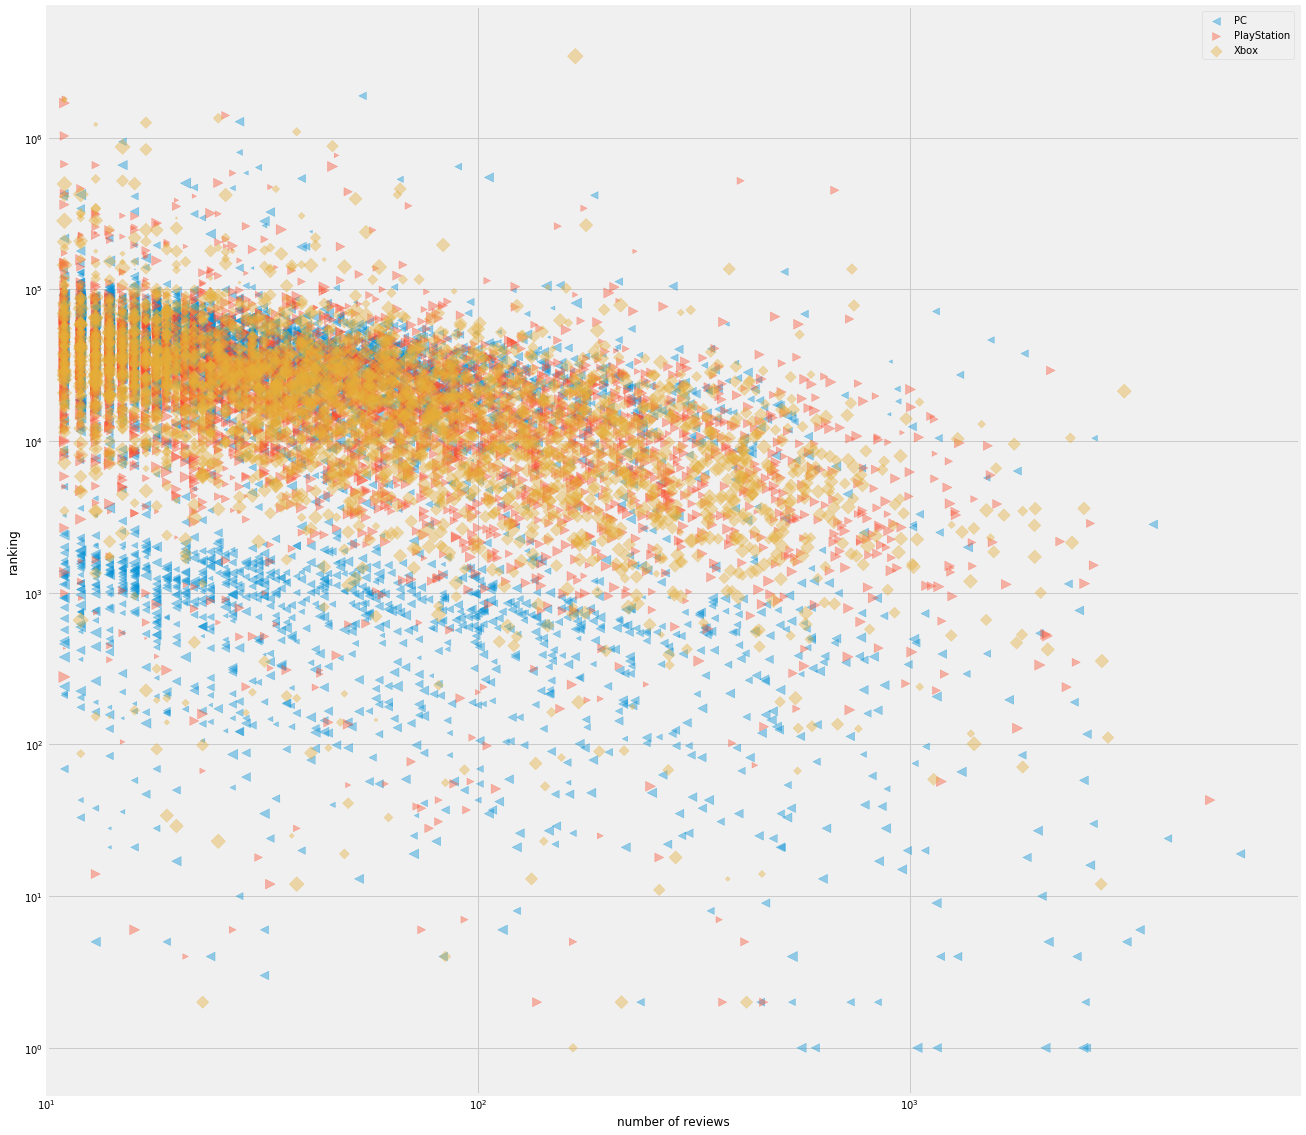

In [100]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)

#ax.scatter(x1,y1, alpha=0.4, marker='o', label='Accessories',s=z1)
#ax.scatter(x2,y2, alpha=0.4, marker='v', label='Mac',s=z2)
#ax.scatter(x3,y3, alpha=0.4, marker='^', label='Nintendo',s=z3)
ax.scatter(x4,y4, alpha=0.4, marker='<', label='PC',s=z4)
ax.scatter(x5,y5, alpha=0.4, marker='>', label='PlayStation',s=z5)
#ax.scatter(x6,y6, alpha=0.4, marker='s', label='Retro Gaming & Microconsoles',s=z6)
#ax.scatter(x7,y7, alpha=0.4, marker='*', label='Wii',s=z7)
ax.scatter(x8,y8, alpha=0.4, marker='D', label='Xbox',s=z8)



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10)
ax.set_ylim(ymin=0.5)

ax.set_xlabel('number of reviews')
ax.set_ylabel('ranking')

ax.legend(loc='best')

fig.tight_layout
plt.show()

In [94]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf

In [79]:
m_0 = smf.ols('rank2 ~ count + overall',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  rank2   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     172.7
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           4.20e-75
Time:                        15:23:02   Log-Likelihood:            -2.5811e+05
No. Observations:               20320   AIC:                         5.162e+05
Df Residuals:                   20317   BIC:                         5.162e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.199e+04   3857.865     21.253      0.0

In [101]:
dfnewfinal

,index,overall,count,rank2,cat2
3,0439381673,3.404762,42,5927,PC
17,0700026398,4.111111,18,58163,PC
19,0700026657,3.301887,53,30230,PC
20,0700099867,3.435897,78,50093,PC
31,1616616873,4.727273,11,69172,PC
...,...,...,...,...,...
41721,B01HIU43S4,3.076923,13,57498,Accessories
41722,B01HIZF7XE,4.706587,167,2260,Xbox
41724,B01HIZGKOE,3.346154,26,5207,PlayStation
41727,B01HJC33WS,4.571429,21,16087,Xbox


In [102]:
dfnewfinal.loc[:,'count2'] = 1
gr_cat2 = dfnewfinal.groupby('cat2')

In [104]:
dfnewfinal9 = pd.DataFrame(gr_cat2['count'].agg(np.sum))
dfnewfinal10 = pd.DataFrame(gr_cat2['count2'].agg(np.sum))
dfnewfinal11 = pd.DataFrame(gr_cat2['rank2'].agg(np.median))

In [105]:
dfnewfinal9

,count
cat2,
Accessories,31607
Mac,9065
Nintendo,151123
PC,410780
PlayStation,430033
Retro Gaming & Microconsoles,233885
Wii,189458
Xbox,388550
